# Task 2

In [1]:
import tensorflow as tf
import os
import pathlib
import random
from shutil import move
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow_datasets as tfds

Before running the code below run the to_image.py file using command:

`python to_image.py "mnist-orig" "mnist-image"`

To change the sizes of the images I converted the dataset into images and then rconverted the images into (100, 75, 3)

In [2]:
data_dir = pathlib.Path('mnist-image/training')

In [3]:
img_height = 100
img_width = 75
batch_size = 8

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  label_mode = "categorical",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  label_mode = "categorical",
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 60000 files belonging to 10 classes.
Using 48000 files for training.
Found 60000 files belonging to 10 classes.
Using 12000 files for validation.


### Load our Pretrained Model.

In [5]:
base_model = keras.models.load_model("main_model")

### Get the summary of our model.

In [6]:
base_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_zoom (RandomZoom)     (None, 100, 75, 3)        0         
_________________________________________________________________
random_contrast (RandomContr (None, 100, 75, 3)        0         
_________________________________________________________________
random_rotation (RandomRotat (None, 100, 75, 3)        0         
_________________________________________________________________
random_zoom_1 (RandomZoom)   (None, 100, 75, 3)        0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 100, 75, 3)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 98, 73, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 36, 32)       

### Load our model and customise it to only predict 10 classes.

In [7]:
for layer in base_model.layers:
    layer.trainable=False
last_layer = base_model.get_layer('max_pooling2d_5')
last_output = last_layer.output
x = layers.Flatten()(last_output)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(10, activation='softmax')(x)

model = Model(base_model.input, x)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(
          train_ds,
          validation_data=val_ds, 
          epochs=15,
        )

Epoch 1/15
6000/6000 [==============================] - 62s 10ms/step - loss: 0.4288 - accuracy: 0.8692 - val_loss: 0.0716 - val_accuracy: 0.9785
Epoch 2/15
6000/6000 [==============================] - 62s 10ms/step - loss: 0.1559 - accuracy: 0.9534 - val_loss: 0.0658 - val_accuracy: 0.9825
Epoch 3/15
6000/6000 [==============================] - 65s 11ms/step - loss: 0.1438 - accuracy: 0.9580 - val_loss: 0.0645 - val_accuracy: 0.9830
Epoch 4/15
6000/6000 [==============================] - 64s 11ms/step - loss: 0.1382 - accuracy: 0.9607 - val_loss: 0.0686 - val_accuracy: 0.9816
Epoch 5/15
6000/6000 [==============================] - 62s 10ms/step - loss: 0.1188 - accuracy: 0.9651 - val_loss: 0.0601 - val_accuracy: 0.9838
Epoch 6/15
6000/6000 [==============================] - 62s 10ms/step - loss: 0.1264 - accuracy: 0.9640 - val_loss: 0.0723 - val_accuracy: 0.9830
Epoch 7/15
6000/6000 [==============================] - 62s 10ms/step - loss: 0.1219 - accuracy: 0.9655 - val_loss: 0.0632 -

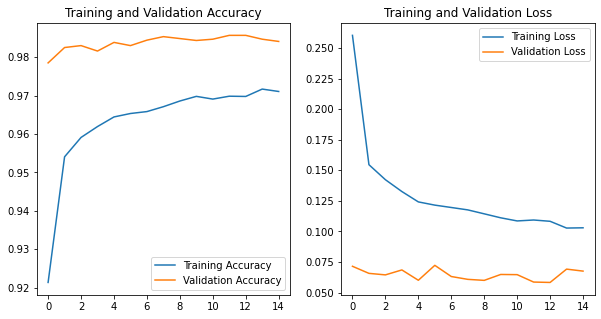

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### We get Training accuracy - 0.9692 and Validation accuracy: 0.9858 on our pretrained model.

In [10]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model2.fit(
      train_ds,
      epochs=15,
      validation_data=val_ds,
    )

Epoch 1/15
6000/6000 [==============================] - 148s 25ms/step - loss: 0.5680 - accuracy: 0.9148 - val_loss: 0.0615 - val_accuracy: 0.9805
Epoch 2/15
6000/6000 [==============================] - 147s 25ms/step - loss: 0.0792 - accuracy: 0.9775 - val_loss: 0.0957 - val_accuracy: 0.9821
Epoch 3/15
6000/6000 [==============================] - 148s 25ms/step - loss: 0.0668 - accuracy: 0.9820 - val_loss: 0.0486 - val_accuracy: 0.9863
Epoch 4/15
6000/6000 [==============================] - 148s 25ms/step - loss: 0.0557 - accuracy: 0.9849 - val_loss: 0.0497 - val_accuracy: 0.9868
Epoch 5/15
6000/6000 [==============================] - 148s 25ms/step - loss: 0.0467 - accuracy: 0.9880 - val_loss: 0.0591 - val_accuracy: 0.9883
Epoch 6/15
6000/6000 [==============================] - 150s 25ms/step - loss: 0.0428 - accuracy: 0.9887 - val_loss: 0.0695 - val_accuracy: 0.9833
Epoch 7/15
6000/6000 [==============================] - 148s 25ms/step - loss: 0.0362 - accuracy: 0.9905 - val_loss: 0

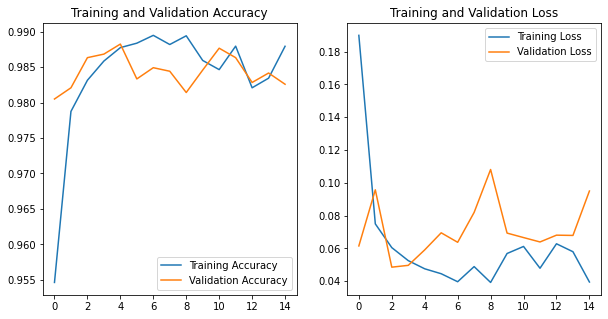

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### We get Training accuracy - 0.9961 and Validation accuracy: 0.9876 if we build our model from scratch.
Let's save this model to label the images in the Task 3.

In [12]:
model2.save("Task_2_Random_Initialization_Model")

INFO:tensorflow:Assets written to: Task_2_Random_Initialization_Model/assets
